<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/Copy_of_XGBR2_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install flaml

     |████████████████████████████████| 130 kB 5.3 MB/s 
     |████████████████████████████████| 2.0 MB 11.7 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [3]:
#import auto hyperparameter tuning
from flaml import AutoML
#designed for Jupyter/kaggle/colab
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing
#import models
import xgboost as xg

In [4]:
 #MT4 csv 
df1=pd.read_csv('EURUSD1440.csv', names=['d','t','eu_o','eu_h','eu_l','eu_c','eu_v'])
df1 = df1.tail(2000)
df2=pd.read_csv('GBPUSD1440.csv', names=['d','t','gu_o','gu_h','gu_l','gu_c','gu_v'])
df2 = df2.tail(2000)

df3=pd.read_csv('USDCAD1440.csv', names=['d','t','uc_o','uc_h','uc_l','uc_c','uc_v'])
df3 = df3.tail(2000)

df4=pd.read_csv('USDCHF1440.csv', names=['d','t','uf_o','uf_h','uf_l','uf_c','uf_v'])
df4 = df4.tail(2000)

df5=pd.read_csv('USDJPY1440.csv', names=['d','t','uj_o','uj_h','uj_l','uj_c','uj_v'])
df5 = df5.tail(2000)

df6=pd.read_csv('USDSEK1440.csv', names=['d','t','us_o','us_h','us_l','us_c','us_v'])
df6 = df6.tail(2000)

#using merge
df_m_1 = df1.merge(df2, on='d')
df_m_2 = df_m_1.merge(df3, on='d')
df_m_3 = df_m_2.merge(df4, on='d')
df_m_4 = df_m_3.merge(df5, on='d')
df_m_5 = df_m_4.merge(df6, on='d')
df_m_5 = df_m_5.drop(columns='t_x')
df_m_5 = df_m_5.drop(columns='t_y')

pd.set_option('display.max_columns', None)
print(df_m_5) 

               d     eu_o     eu_h     eu_l     eu_c    eu_v     gu_o  \
0     2014.03.14  1.38676  1.39374  1.38473  1.39134   77320  1.66229   
1     2014.03.17  1.39062  1.39474  1.38788  1.39252   54560  1.66419   
2     2014.03.18  1.39251  1.39427  1.38797  1.39304   65439  1.66356   
3     2014.03.19  1.39304  1.39329  1.38095  1.38223   71553  1.65916   
4     2014.03.20  1.38226  1.38448  1.37490  1.37782   73086  1.65376   
...          ...      ...      ...      ...      ...     ...      ...   
1993  2021.11.23  1.12339  1.12748  1.12258  1.12483  104536  1.33930   
1994  2021.11.24  1.12467  1.12551  1.11859  1.12000  112792  1.33744   
1995  2021.11.25  1.11959  1.12295  1.11959  1.12062   44916  1.33243   
1996  2021.11.26  1.12058  1.13295  1.12051  1.13177  138554  1.33158   
1997  2021.11.29  1.13063  1.13117  1.13052  1.13097     207  1.33386   

         gu_h     gu_l     gu_c   gu_v     uc_o     uc_h     uc_l     uc_c  \
0     1.66499  1.65869  1.66439  65960  1.107

In [5]:
df_m_5.tail()

,d,eu_o,eu_h,eu_l,eu_c,eu_v,gu_o,gu_h,gu_l,gu_c,gu_v,uc_o,uc_h,uc_l,uc_c,uc_v,uf_o,uf_h,uf_l,uf_c,uf_v,uj_o,uj_h,uj_l,uj_c,uj_v,us_o,us_h,us_l,us_c,us_v
1993,2021.11.23,1.12339,1.12748,1.12258,1.12483,104536,1.33930,1.34086,1.33418,1.33780,35730,1.26948,1.27444,1.26599,1.26693,34331,0.93086,0.93439,0.93011,0.93313,30715,114.870,115.192,114.480,115.129,49655,8.98692,9.05286,8.97004,9.04097,40131
1994,2021.11.24,1.12467,1.12551,1.11859,1.12000,112792,1.33744,1.33892,1.33151,1.33280,33435,1.26663,1.27097,1.26509,1.26648,34606,0.93283,0.93733,0.93209,0.93392,29908,115.111,115.521,114.822,115.401,47423,9.03311,9.14057,9.02853,9.12259,36605
1995,2021.11.25,1.11959,1.12295,1.11959,1.12062,44916,1.33243,1.33530,1.33047,1.33164,25719,1.26555,1.26766,1.26402,1.26456,19538,0.93382,0.93613,0.93239,0.93564,21596,115.402,115.455,115.239,115.341,23627,9.11333,9.12367,9.05598,9.07990,26093
1996,2021.11.26,1.12058,1.13295,1.12051,1.13177,138554,1.33158,1.33596,1.32772,1.33235,42921,1.26449,1.27994,1.26449,1.27860,41366,0.93575,0.93589,0.92107,0.92347,44008,115.296,115.365,113.052,113.285,87016,9.08432,9.18200,9.06362,9.14441,40881
1997,2021.11.29,1.13063,1.13117,1.13052,1.13097,207,1.33386,1.33386,1.33263,1.33288,100,1.27580,1.27616,1.27517,1.27557,315,0.92255,0.92295,0.92145,0.92238,47,113.538,113.578,113.354,113.380,679,9.11969,9.13061,9.11042,9.12102,108


In [6]:
df_m_5.insert(1,'index',df_m_5.index)

In [7]:
#new column: high vs low
df_m_5['eu_h_or_l'] = ((df_m_5.eu_h - df_m_5.eu_o) > (df_m_5.eu_o - df_m_5.eu_l)) 
df_m_5.eu_h_or_l = df_m_5.eu_h_or_l.replace({True:1,False:0})

#new column: close vs yesterday
df_m_5['eu_c_vs_c'] = (df_m_5.eu_c > df_m_5.eu_o) 
df_m_5.eu_c_vs_c = df_m_5.eu_c_vs_c.replace({True:1,False:0})

#new column: shift tomorrow to today
df_m_5['eu_High_next_day'] = df_m_5['eu_h'].shift(-1)
df_m_5['eu_Low_next_day'] = df_m_5['eu_l'].shift(-1)
df_m_5['eu_Close_next_day'] = df_m_5['eu_c'].shift(-1)
df_m_5 = df_m_5.dropna()
df_m_5.tail()

,d,index,eu_o,eu_h,eu_l,eu_c,eu_v,gu_o,gu_h,gu_l,gu_c,gu_v,uc_o,uc_h,uc_l,uc_c,uc_v,uf_o,uf_h,uf_l,uf_c,uf_v,uj_o,uj_h,uj_l,uj_c,uj_v,us_o,us_h,us_l,us_c,us_v,eu_h_or_l,eu_c_vs_c,eu_High_next_day,eu_Low_next_day,eu_Close_next_day
1992,2021.11.22,1992,1.12878,1.12903,1.12306,1.12333,110260,1.34503,1.34503,1.33838,1.33944,36466,1.26400,1.27048,1.26277,1.26995,28908,0.92767,0.93345,0.92667,0.93325,29297,113.937,114.959,113.923,114.871,48575,8.93010,9.01339,8.92970,8.99650,35881,0,0,1.12748,1.12258,1.12483
1993,2021.11.23,1993,1.12339,1.12748,1.12258,1.12483,104536,1.33930,1.34086,1.33418,1.33780,35730,1.26948,1.27444,1.26599,1.26693,34331,0.93086,0.93439,0.93011,0.93313,30715,114.870,115.192,114.480,115.129,49655,8.98692,9.05286,8.97004,9.04097,40131,1,1,1.12551,1.11859,1.12000
1994,2021.11.24,1994,1.12467,1.12551,1.11859,1.12000,112792,1.33744,1.33892,1.33151,1.33280,33435,1.26663,1.27097,1.26509,1.26648,34606,0.93283,0.93733,0.93209,0.93392,29908,115.111,115.521,114.822,115.401,47423,9.03311,9.14057,9.02853,9.12259,36605,0,0,1.12295,1.11959,1.12062
1995,2021.11.25,1995,1.11959,1.12295,1.11959,1.12062,44916,1.33243,1.33530,1.33047,1.33164,25719,1.26555,1.26766,1.26402,1.26456,19538,0.93382,0.93613,0.93239,0.93564,21596,115.402,115.455,115.239,115.341,23627,9.11333,9.12367,9.05598,9.07990,26093,1,1,1.13295,1.12051,1.13177
1996,2021.11.26,1996,1.12058,1.13295,1.12051,1.13177,138554,1.33158,1.33596,1.32772,1.33235,42921,1.26449,1.27994,1.26449,1.27860,41366,0.93575,0.93589,0.92107,0.92347,44008,115.296,115.365,113.052,113.285,87016,9.08432,9.18200,9.06362,9.14441,40881,1,1,1.13117,1.13052,1.13097


In [8]:
df_m_5.isna().sum()

d                    0
index                0
eu_o                 0
eu_h                 0
eu_l                 0
eu_c                 0
eu_v                 0
gu_o                 0
gu_h                 0
gu_l                 0
gu_c                 0
gu_v                 0
uc_o                 0
uc_h                 0
uc_l                 0
uc_c                 0
uc_v                 0
uf_o                 0
uf_h                 0
uf_l                 0
uf_c                 0
uf_v                 0
uj_o                 0
uj_h                 0
uj_l                 0
uj_c                 0
uj_v                 0
us_o                 0
us_h                 0
us_l                 0
us_c                 0
us_v                 0
eu_h_or_l            0
eu_c_vs_c            0
eu_High_next_day     0
eu_Low_next_day      0
eu_Close_next_day    0
dtype: int64

In [9]:
df_m_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d                  1997 non-null   object 
 1   index              1997 non-null   int64  
 2   eu_o               1997 non-null   float64
 3   eu_h               1997 non-null   float64
 4   eu_l               1997 non-null   float64
 5   eu_c               1997 non-null   float64
 6   eu_v               1997 non-null   int64  
 7   gu_o               1997 non-null   float64
 8   gu_h               1997 non-null   float64
 9   gu_l               1997 non-null   float64
 10  gu_c               1997 non-null   float64
 11  gu_v               1997 non-null   int64  
 12  uc_o               1997 non-null   float64
 13  uc_h               1997 non-null   float64
 14  uc_l               1997 non-null   float64
 15  uc_c               1997 non-null   float64
 16  uc_v               1997 

In [10]:
#extract row for variable pred
last_row = df_m_5.iloc[-1:,np.r_[1:34]].values
print(last_row) 

[[1.99600e+03 1.12058e+00 1.13295e+00 1.12051e+00 1.13177e+00 1.38554e+05
  1.33158e+00 1.33596e+00 1.32772e+00 1.33235e+00 4.29210e+04 1.26449e+00
  1.27994e+00 1.26449e+00 1.27860e+00 4.13660e+04 9.35750e-01 9.35890e-01
  9.21070e-01 9.23470e-01 4.40080e+04 1.15296e+02 1.15365e+02 1.13052e+02
  1.13285e+02 8.70160e+04 9.08432e+00 9.18200e+00 9.06362e+00 9.14441e+00
  4.08810e+04 1.00000e+00 1.00000e+00]]


In [11]:
#for high prediction
#select rows to use for x,y
x = df_m_5.iloc[:,np.r_[1:34]].values
print(x)
y = df_m_5.iloc[:,[34]].values
print(y) 

[[0.00000e+00 1.38676e+00 1.39374e+00 ... 6.36990e+04 1.00000e+00
  1.00000e+00]
 [1.00000e+00 1.39062e+00 1.39474e+00 ... 4.66600e+04 1.00000e+00
  1.00000e+00]
 [2.00000e+00 1.39251e+00 1.39427e+00 ... 5.52010e+04 0.00000e+00
  1.00000e+00]
 ...
 [1.99400e+03 1.12467e+00 1.12551e+00 ... 3.66050e+04 0.00000e+00
  0.00000e+00]
 [1.99500e+03 1.11959e+00 1.12295e+00 ... 2.60930e+04 1.00000e+00
  1.00000e+00]
 [1.99600e+03 1.12058e+00 1.13295e+00 ... 4.08810e+04 1.00000e+00
  1.00000e+00]]
[[1.39474]
 [1.39427]
 [1.39329]
 ...
 [1.12295]
 [1.13295]
 [1.13117]]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [ ]:
automl_reg = AutoML()
automl_reg.fit(X_train, y_train, task="regression", time_budget=600)

[flaml.automl: 11-29 07:07:59] {1926} INFO - task = regression
[flaml.automl: 11-29 07:07:59] {1928} INFO - Data split method: uniform
[flaml.automl: 11-29 07:07:59] {1932} INFO - Evaluation method: cv
[flaml.automl: 11-29 07:07:59] {1999} INFO - Minimizing error metric: 1-r2
[flaml.automl: 11-29 07:07:59] {2051} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 11-29 07:07:59] {2291} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-29 07:08:00] {2405} INFO - Estimated sufficient time budget=3764s. Estimated necessary time budget=27s.
[flaml.automl: 11-29 07:08:00] {2485} INFO -  at 0.4s,	estimator lgbm's best error=0.4787,	best estimator lgbm's best error=0.4787
[flaml.automl: 11-29 07:08:00] {2291} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-29 07:08:00] {2485} INFO -  at 0.5s,	estimator lgbm's best error=0.4787,	best estimator lgbm's best error=0.4787
[flaml.automl: 11-29 07:08:00] {2291} INFO 

In [63]:
#import suggested algo
from sklearn.ensemble import ExtraTreesRegressor
sugg_reg=ExtraTreesRegressor(max_features=1.0, max_leaf_nodes=142, n_estimators=4,
                    n_jobs=-1)

In [65]:
#fit suggested algo
automl_reg.fit(X_train,y_train)
y_pred_h = automl_reg.predict(last_row)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature: 0, Score: 0.00004
Feature: 1, Score: 0.21851
Feature: 2, Score: 0.03021
Feature: 3, Score: 0.18116
Feature: 4, Score: 0.21342
Feature: 5, Score: 0.00007
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00003
Feature: 8, Score: 0.00017
Feature: 9, Score: 0.01372
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.00005
Feature: 12, Score: 0.00003
Feature: 13, Score: 0.14749
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00004
Feature: 16, Score: 0.00052
Feature: 17, Score: 0.00014
Feature: 18, Score: 0.01192
Feature: 19, Score: 0.00023
Feature: 20, Score: 0.00005
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00059
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00004
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00025
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.18047
Feature: 29, Score: 0.00020
Feature: 30, Score: 0.00004
Feature: 31, Score: 0.00004
Feature: 32, Score: 0.00033


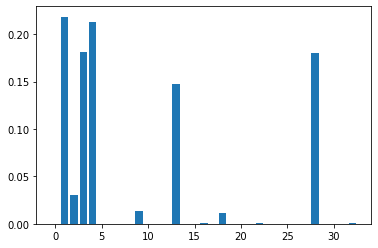

In [66]:
# get importance
importance = automl_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 # plot
plt.bar(range(len(automl_reg.feature_importances_)), automl_reg.feature_importances_)
plt.show()

In [24]:
#high prediction
y_pred_h = automl_reg.predict(last_row) 
print('high prediction is:', y_pred_h)

high prediction is: [1.13376798]


In [21]:
#mape variable for error score below
def mean_absolute_percentage_error(y_true,y_pred_h):
  y_true, y_pred = np.array(y_true), np.array(y_pred_h)
  return np.mean(np.abs((y_true - y_pred_h) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test,y_pred_h)

In [40]:
#regression error for y_pred_h 
from sklearn.metrics import max_error, mean_absolute_error,mean_squared_log_error, mean_squared_error, r2_score 
print("r2 score :" ,r2_score(y_test,y_pred_h))
print('max error value :',max_error(y_test,y_pred_h))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_h))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_h)))
print('MAPE:', mape)
print('MedAE', metrics.median_absolute_error(y_test,y_pred_h)) 
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_h))
print("mean squared log error :", mean_squared_log_error(y_test,y_pred_h))

r2 score : -1.1666709175323433
max error value : 0.3310230762987014
MSE: 0.012202587929724184
RMSE: 0.1104653245580901
MAPE: 6.793333971157281
MedAE 0.05868630654761908
MAE: 0.08221174653402351
mean squared log error : 0.0025001776882484887


In [32]:
#for low prediction
#select rows to use for x,y
x = df_m_5.iloc[:,np.r_[1:34]].values
print(x)
y = df_m_5.iloc[:,[35]].values
print(y) 

[[0.00000e+00 1.38676e+00 1.39374e+00 ... 6.36990e+04 1.00000e+00
  1.00000e+00]
 [1.00000e+00 1.39062e+00 1.39474e+00 ... 4.66600e+04 1.00000e+00
  1.00000e+00]
 [2.00000e+00 1.39251e+00 1.39427e+00 ... 5.52010e+04 0.00000e+00
  1.00000e+00]
 ...
 [1.99400e+03 1.12467e+00 1.12551e+00 ... 3.66050e+04 0.00000e+00
  0.00000e+00]
 [1.99500e+03 1.11959e+00 1.12295e+00 ... 2.60930e+04 1.00000e+00
  1.00000e+00]
 [1.99600e+03 1.12058e+00 1.13295e+00 ... 4.08810e+04 1.00000e+00
  1.00000e+00]]
[[1.38788]
 [1.38797]
 [1.38095]
 ...
 [1.11959]
 [1.12051]
 [1.13052]]


In [33]:
#for low prediction
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [34]:
automl_reg = AutoML()
automl_reg.fit(X_train, y_train, task="regression", time_budget=600)

[flaml.automl: 11-29 03:46:04] {1926} INFO - task = regression
[flaml.automl: 11-29 03:46:04] {1928} INFO - Data split method: uniform
[flaml.automl: 11-29 03:46:04] {1932} INFO - Evaluation method: cv
[flaml.automl: 11-29 03:46:04] {1999} INFO - Minimizing error metric: 1-r2
[flaml.automl: 11-29 03:46:04] {2051} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 11-29 03:46:04] {2291} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-29 03:46:04] {2405} INFO - Estimated sufficient time budget=987s. Estimated necessary time budget=7s.
[flaml.automl: 11-29 03:46:04] {2485} INFO -  at 0.1s,	estimator lgbm's best error=0.4775,	best estimator lgbm's best error=0.4775
[flaml.automl: 11-29 03:46:04] {2291} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-29 03:46:04] {2485} INFO -  at 0.2s,	estimator lgbm's best error=0.4775,	best estimator lgbm's best error=0.4775
[flaml.automl: 11-29 03:46:04] {2291} INFO - 

In [ ]:
#import suggested algo
from sklearn.ensemble import ExtraTreesRegressor
sugg_reg=ExtraTreesRegressor(max_features=1.0, max_leaf_nodes=142, n_estimators=4,
                    n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [20]:
#for low prediction and accuracy test
# create regressor object
regressor = xg.XGBRegressor(n_estimators=2000, n_jobs=-1)
#regressor = rf(n_estimators = 1000, n_jobs=-1, criterion="absolute_error", random_state=2)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

[20:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=2000, n_jobs=-1)

Feature: 0, Score: 0.01669
Feature: 1, Score: 0.00856
Feature: 2, Score: 0.02083
Feature: 3, Score: 0.16896
Feature: 4, Score: 0.74752
Feature: 5, Score: 0.00018
Feature: 6, Score: 0.00028
Feature: 7, Score: 0.00010
Feature: 8, Score: 0.00026
Feature: 9, Score: 0.01288
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00018
Feature: 12, Score: 0.00011
Feature: 13, Score: 0.00018
Feature: 14, Score: 0.00028
Feature: 15, Score: 0.00011
Feature: 16, Score: 0.00025
Feature: 17, Score: 0.00036
Feature: 18, Score: 0.00010
Feature: 19, Score: 0.00020
Feature: 20, Score: 0.00012
Feature: 21, Score: 0.00018
Feature: 22, Score: 0.00013
Feature: 23, Score: 0.00015
Feature: 24, Score: 0.00010
Feature: 25, Score: 0.00009
Feature: 26, Score: 0.00025
Feature: 27, Score: 0.01739
Feature: 28, Score: 0.00270
Feature: 29, Score: 0.00023
Feature: 30, Score: 0.00011
Feature: 31, Score: 0.00007
Feature: 32, Score: 0.00035


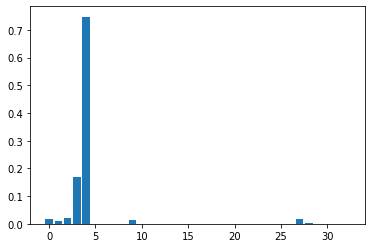

In [21]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 # plot
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.show()

In [22]:
#for low pred 
y_pred = regressor.predict(X_test)
mape = mean_absolute_percentage_error(y_test,y_pred)

In [23]:
#for low pred regression score
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape)
print('MedAE', metrics.median_absolute_error(y_test,y_pred)) 

MAE: 0.003097199056879681
MSE: 1.7747905271849363e-05
RMSE: 0.004212826280758484
MAPE: 7.126088641613423
MedAE 0.0024344626045226248


In [24]:
#for low pred 
y_pred_l = regressor.predict(last_row) # test the output by changing values
print('low prediction is:', y_pred_l)

low prediction is: [1.1204342]


In [25]:
# #for low prediction
# # Visualising the Random Forest Regression results

# # arange for creating a range of values
# # from min value of x to max
# # value of x with a difference of 0.01
# # between two consecutive values
# X_grid = np.arange(min(x), max(x), 1)

# # reshape for reshaping the data into a len(X_grid)*1 array,
# # i.e. to make a column out of the X_grid value				
# X_grid = X_grid.reshape((len(X_grid), 1))

# # Scatter plot for original data
# plt.scatter(x, y, color = 'blue')

# # plot predicted data
# plt.scatter(X_grid, regressor.predict(X_grid),
# 		color = 'green')
# plt.title('Random Forest Regression')
# plt.xlabel('Position level')
# plt.ylabel('EURUSD')
# plt.xlim(7980,8000)
# plt.ylim(1.15,1.17)
# plt.show()

In [26]:
#for close prediction
#select rows to use for x,y
x = df_m_5.iloc[:,np.r_[1:34]].values
print(x)
y = df_m_5.iloc[:,[36]].values
print(y) 

[[0.00000e+00 1.39018e+00 1.39666e+00 ... 6.90290e+04 1.00000e+00
  0.00000e+00]
 [1.00000e+00 1.38676e+00 1.39374e+00 ... 6.36990e+04 1.00000e+00
  1.00000e+00]
 [2.00000e+00 1.39062e+00 1.39474e+00 ... 4.66600e+04 1.00000e+00
  1.00000e+00]
 ...
 [1.99400e+03 1.12339e+00 1.12748e+00 ... 4.01310e+04 1.00000e+00
  1.00000e+00]
 [1.99500e+03 1.12467e+00 1.12551e+00 ... 3.66050e+04 0.00000e+00
  0.00000e+00]
 [1.99600e+03 1.11959e+00 1.12295e+00 ... 2.60930e+04 1.00000e+00
  1.00000e+00]]
[[1.39134]
 [1.39252]
 [1.39304]
 ...
 [1.12   ]
 [1.12062]
 [1.13177]]


In [27]:
#for close prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [28]:
#for close prediction and accuracy test

# create regressor object
regressor = xg.XGBRegressor(n_estimators=2000, n_jobs=-1)
#regressor = rf(n_estimators = 1000, n_jobs=-1, criterion="absolute_error", random_state=3)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

[20:54:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=2000, n_jobs=-1)

Feature: 0, Score: 0.04413
Feature: 1, Score: 0.01640
Feature: 2, Score: 0.02931
Feature: 3, Score: 0.14859
Feature: 4, Score: 0.69968
Feature: 5, Score: 0.00018
Feature: 6, Score: 0.00023
Feature: 7, Score: 0.02888
Feature: 8, Score: 0.00039
Feature: 9, Score: 0.00021
Feature: 10, Score: 0.00027
Feature: 11, Score: 0.00037
Feature: 12, Score: 0.00024
Feature: 13, Score: 0.00017
Feature: 14, Score: 0.00033
Feature: 15, Score: 0.00022
Feature: 16, Score: 0.00025
Feature: 17, Score: 0.00023
Feature: 18, Score: 0.00023
Feature: 19, Score: 0.00027
Feature: 20, Score: 0.00025
Feature: 21, Score: 0.00027
Feature: 22, Score: 0.00028
Feature: 23, Score: 0.00018
Feature: 24, Score: 0.00023
Feature: 25, Score: 0.00019
Feature: 26, Score: 0.01003
Feature: 27, Score: 0.00027
Feature: 28, Score: 0.01646
Feature: 29, Score: 0.00037
Feature: 30, Score: 0.00018
Feature: 31, Score: 0.00028
Feature: 32, Score: 0.00043


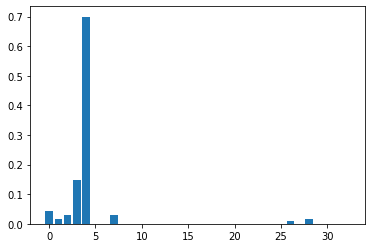

In [29]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 # plot
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.show()

In [30]:
#for close prediction
y_pred = regressor.predict(X_test)
mape = mean_absolute_percentage_error(y_test,y_pred)

In [31]:
#for close regression score
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape)
print('MedAE', metrics.median_absolute_error(y_test,y_pred)) 
#print('MdAPE', metrics)

MAE: 0.004636723933283488
MSE: 3.5010545068024744e-05
RMSE: 0.0059169709368920125
MAPE: 6.654444617216608
MedAE 0.0037991266059875795


In [32]:
#for close pred 
y_pred_c = regressor.predict(last_row) # test the output by changing values
print('close prediction is:', y_pred_c)

close prediction is: [1.130388]


In [33]:
print('Today the predictions are:')
print('high', y_pred_h)
print('close', y_pred_c)
print('low', y_pred_l)
print('Please use these as polarities.')

Today the predictions are:
high [1.1317697]
close [1.130388]
low [1.1204342]
Please use these as polarities.


In [34]:
# #for high prediction
# # Visualising the Random Forest Regression results

# # arange for creating a range of values
# # from min value of x to max
# # value of x with a difference of 0.01
# # between two consecutive values
# X_grid = np.arange(min(x), max(x), 1)

# # reshape for reshaping the data into a len(X_grid)*1 array,
# # i.e. to make a column out of the X_grid value				
# X_grid = X_grid.reshape((len(X_grid), 1))

# # Scatter plot for original data
# plt.scatter(x, y, color = 'blue')

# # plot predicted data
# plt.scatter(X_grid, regressor.predict(X_grid),
# 		color = 'green')
# plt.title('Random Forest Regression')
# plt.xlabel('Position level')
# plt.ylabel('EURUSD')
# plt.xlim(7980,8002)
# plt.ylim(1.15,1.17)
# plt.show()